<a href="https://colab.research.google.com/github/syahh-coder/Deploy_Capstone_Project/blob/main/Model_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import kagglehub



In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d jayaantanaath/student-habits-vs-academic-performance

Dataset URL: https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
License(s): apache-2.0
student-habits-vs-academic-performance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip student-habits-vs-academic-performance.zip

Archive:  student-habits-vs-academic-performance.zip
replace student_habits_performance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
df= pd.read_csv("student_habits_performance.csv")

df.head(10)

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,2,Master,Poor,4,No,89.8
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,0,Bachelor,Average,8,No,72.6
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,3,Bachelor,Good,1,No,78.9
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0


# Dropping Unused Column

In [ ]:
df = df.drop(['student_id', 'diet_quality', 'parental_education_level', 'internet_quality'], axis=1)
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,6,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,6,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,1,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,4,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,3,1,No,66.4


# Splitting Numerical & Categorical Cols

In [ ]:
numcols = [var for var in df.columns if df[var].dtype != 'object']
catcols = [var for var in df.columns if df[var].dtype == 'object']

print("Numerical: ", numcols)
print("Categorical: ", catcols)

Numerical:  ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 'attendance_percentage', 'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']
Categorical:  ['gender', 'part_time_job', 'extracurricular_participation']


# Handling Missing Values

Missing

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
age,0
gender,0
study_hours_per_day,0
social_media_hours,0
netflix_hours,0
part_time_job,0
attendance_percentage,0
sleep_hours,0
exercise_frequency,0
mental_health_rating,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Combining social media hours & netflix hours

In [ ]:
social_media_hours = [
  'social_media_hours',
  'netflix_hours'
]
df['social_media_hours'] = df[social_media_hours].sum(axis=1)
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,2.3,1.1,No,85.0,8.0,6,8,Yes,56.2
1,20,Female,6.9,5.1,2.3,No,97.3,4.6,6,8,No,100.0
2,21,Male,1.4,4.4,1.3,No,94.8,8.0,1,1,No,34.3
3,23,Female,1.0,4.9,1.0,No,71.0,9.2,4,1,Yes,26.8
4,19,Female,5.0,4.9,0.5,No,90.9,4.9,3,1,No,66.4


In [ ]:
df = df.drop(['netflix_hours'], axis=1)

# Feature Extraction

In [ ]:
numcols = [var for var in df.columns if df[var].dtype != 'object']
catcols = [var for var in df.columns if df[var].dtype == 'object']

for col in numcols:
  print(df[col].value_counts())
  print('-'*50)

age
20    146
24    134
17    133
21    125
23    119
18    117
19    113
22    113
Name: count, dtype: int64
--------------------------------------------------
study_hours_per_day
3.5    38
3.2    36
4.3    35
3.3    34
3.8    31
       ..
7.5     1
8.2     1
7.6     1
0.1     1
7.1     1
Name: count, Length: 78, dtype: int64
--------------------------------------------------
social_media_hours
4.9    35
4.5    33
4.4    29
5.5    25
4.0    25
       ..
8.1     1
6.2     1
0.9     1
1.0     1
7.9     1
Name: count, Length: 128, dtype: int64
--------------------------------------------------
attendance_percentage
100.0    66
85.8     12
85.3      8
84.8      7
83.2      7
         ..
72.9      1
93.5      1
71.4      1
59.9      1
62.0      1
Name: count, Length: 320, dtype: int64
--------------------------------------------------
sleep_hours
6.5    40
6.1    36
6.2    35
6.7    34
5.5    33
       ..
9.2     1
9.8     1
3.2     1
3.4     1
9.6     1
Name: count, Length: 68, dtype: int

# EDA

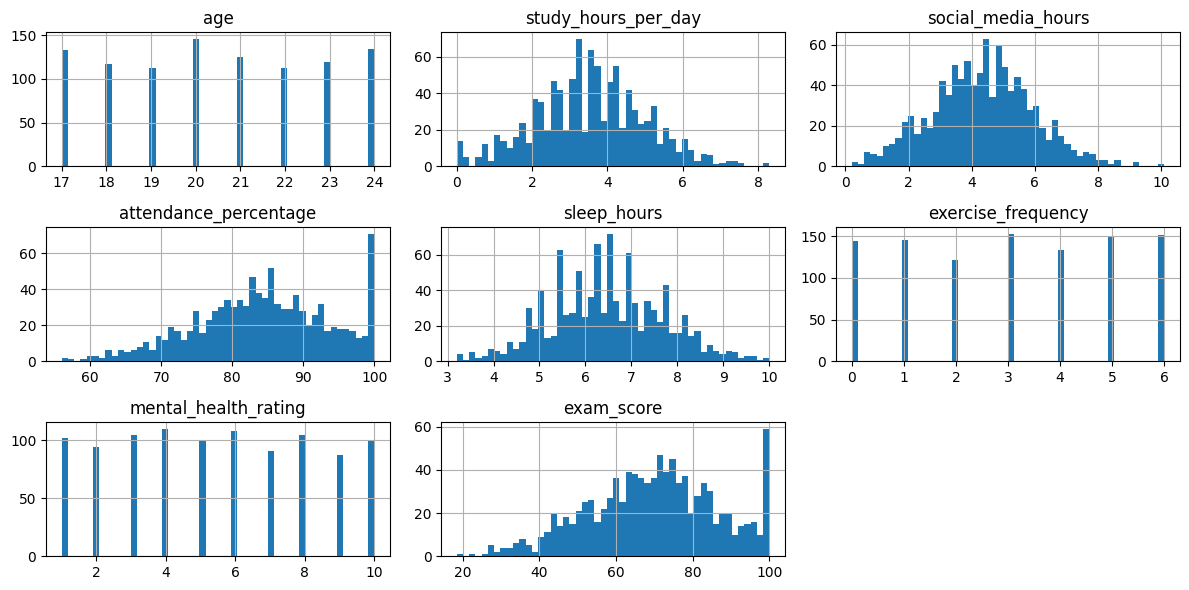

In [ ]:
import matplotlib.pyplot as plt

df[numcols].hist(figsize=(12,6), bins=50)
plt.tight_layout()
plt.show()

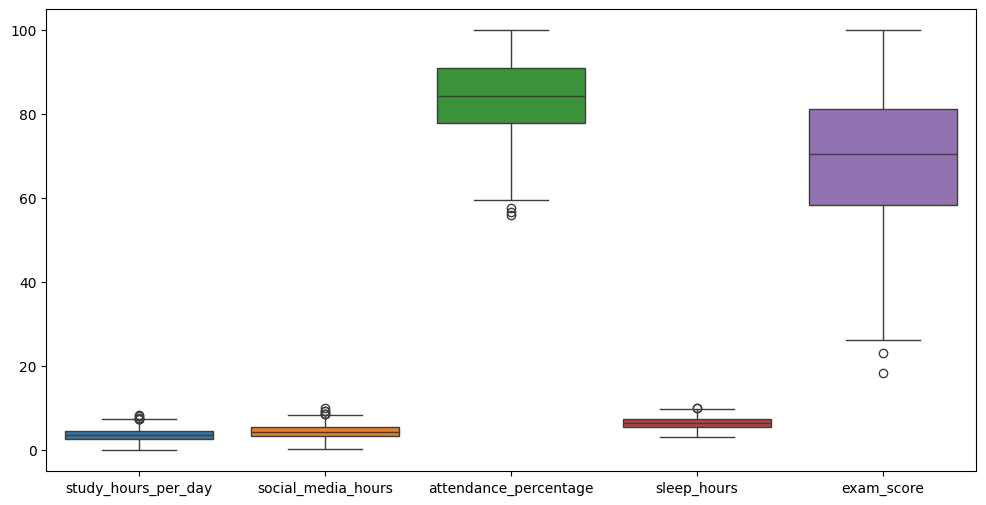

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['study_hours_per_day', 'social_media_hours', 'attendance_percentage', 'sleep_hours', 'exam_score']])
plt.show()

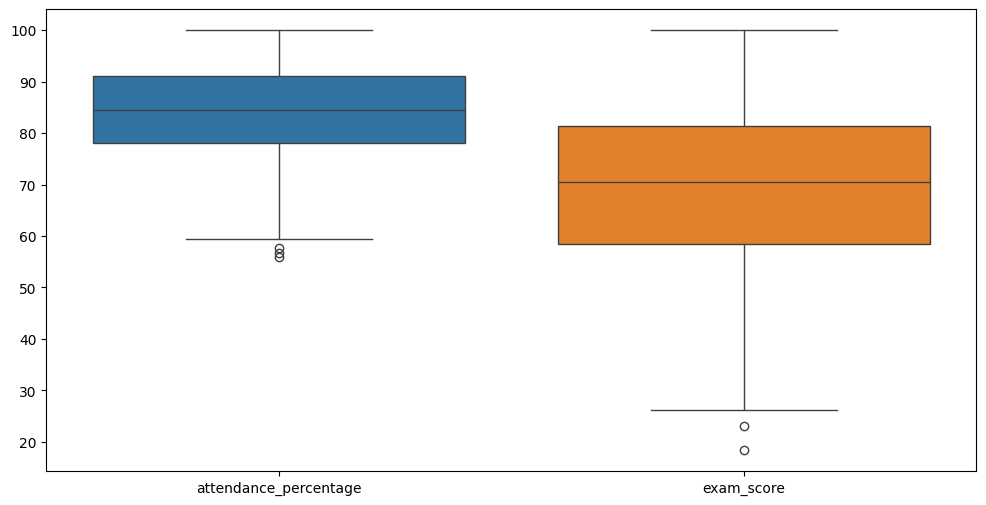

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['attendance_percentage', 'exam_score']])
plt.show()

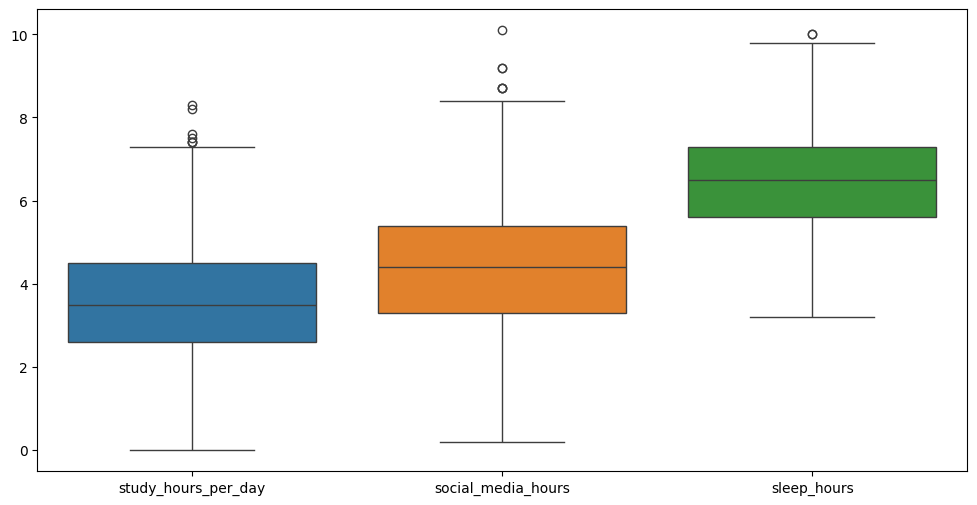

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['study_hours_per_day', 'social_media_hours', 'sleep_hours']])
plt.show()

In [ ]:
for col in catcols:
    print(df[col].value_counts())
    print('-'*50)

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64
--------------------------------------------------
part_time_job
No     785
Yes    215
Name: count, dtype: int64
--------------------------------------------------
extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64
--------------------------------------------------


In [ ]:
df = df[df['gender'] != 'Other']

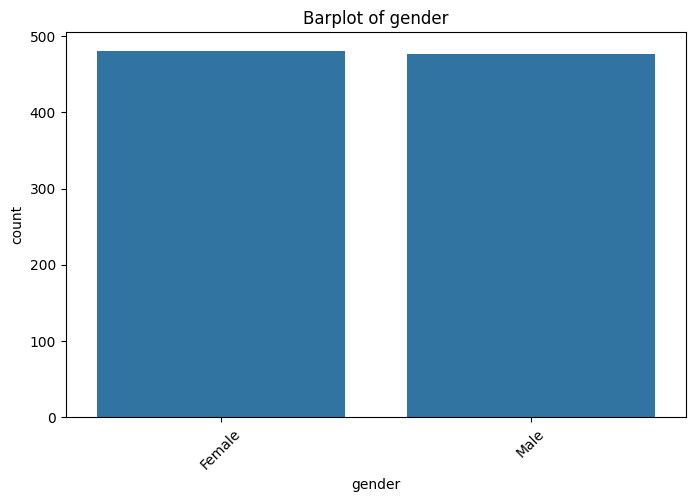

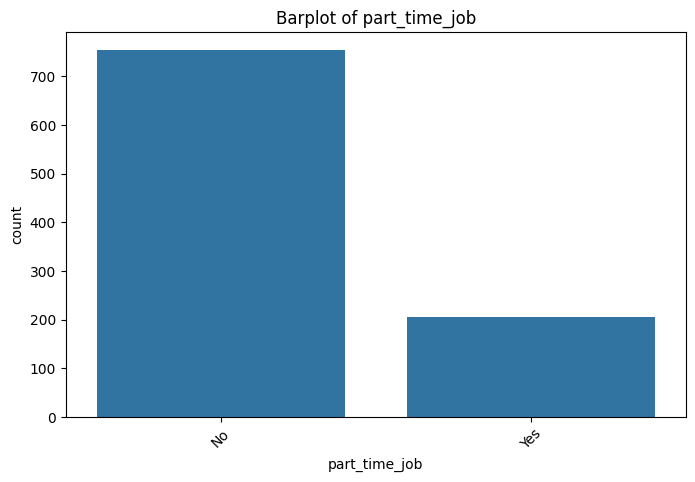

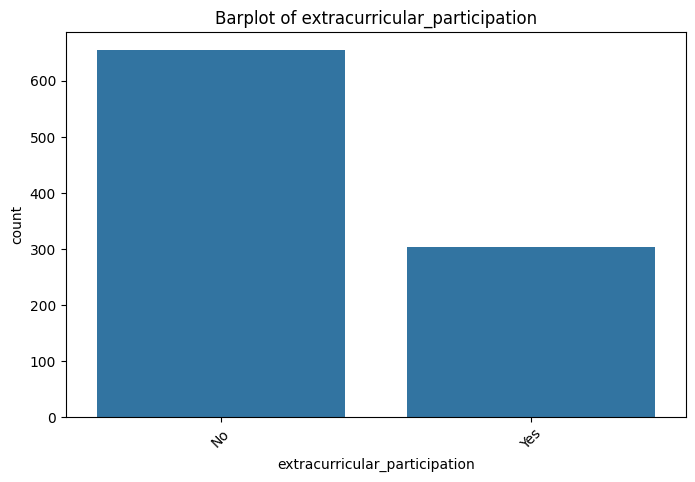

In [ ]:
for col in catcols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Encoding Catcols

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder for each categorical column
encoders = {}
for col in catcols:
    le = LabelEncoder()
    # Fit the encoder on the unique values of the current column
    le.fit(df[col].unique())
    # Store the encoder for later use
    encoders[col] = le
    # Transform the current column using its corresponding encoder
    df[col] = le.transform(df[col])

df_coba = df[(df['mental_health_rating']== 10) & (df['sleep_hours']>6)]
len(df_coba)

61

In [ ]:
from scipy.stats import skew

for cols in numcols:
  skew_cols = skew(df[cols])
  print(f"skew {cols}= {skew_cols}")


skew age= 0.012296651036583148
skew study_hours_per_day= 0.05905126323849591
skew social_media_hours= 0.059877948090106624
skew attendance_percentage= -0.24745082412227837
skew sleep_hours= 0.10647665527975833
skew exercise_frequency= -0.02921068048685076
skew mental_health_rating= 0.03729350138356896
skew exam_score= -0.16386649096368175


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



x=df.drop(['mental_health_rating'], axis=1)
y=df['mental_health_rating']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.2)


model =  RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test,y_pred)

print(f"Mean Squared Error = {mse}")

print(y_pred)
print(y_test)

Mean Squared Error = 5.0235109375
[5.94 3.32 5.15 7.66 2.5  3.92 6.7  5.69 3.38 3.3  3.45 7.84 5.58 8.01
 3.83 7.07 4.52 4.3  2.56 6.58 9.01 4.01 4.71 7.33 8.16 3.54 2.75 4.15
 5.82 5.71 8.8  4.07 4.83 5.24 6.82 7.94 3.48 7.14 5.15 2.83 4.27 3.46
 2.84 4.4  5.28 3.9  5.08 6.26 7.9  5.37 5.8  3.08 7.36 6.73 3.58 7.64
 4.85 4.25 7.11 6.7  2.72 2.75 8.07 6.19 4.8  2.57 6.65 3.25 8.22 6.52
 3.94 7.83 7.53 7.93 5.75 5.   5.22 5.23 6.93 4.56 5.75 4.07 2.89 5.48
 4.71 5.77 3.04 7.   6.98 6.13 5.05 6.29 7.54 7.79 5.85 2.7  6.35 7.89
 4.41 7.34 5.93 6.23 6.75 7.51 4.98 5.47 6.07 5.78 5.9  7.4  6.22 5.06
 6.7  4.73 7.65 4.51 3.85 4.54 3.96 4.61 2.58 5.76 7.   2.42 3.23 2.96
 7.32 5.01 5.89 4.36 4.11 4.03 3.56 4.28 3.13 8.06 7.43 6.16 5.49 7.6
 5.43 4.35 6.33 5.53 8.02 4.97 5.45 5.08 5.96 6.91 4.59 5.31 6.77 3.31
 1.76 6.41 6.47 5.66 5.84 3.46 4.09 4.81 3.74 5.89 7.75 4.44 3.49 5.37
 6.62 7.46 4.09 3.04 7.13 3.48 5.01 6.28 4.89 5.23 2.7  2.85 2.78 6.89
 3.86 5.27 3.87 6.04 5.73 5.28 6.62 3.2  4.7

In [ ]:
from xgboost import XGBRegressor
model_2 =  XGBRegressor(n_estimators=500, random_state=42, learning_rate = 0.03)
model_2.fit(x_train,y_train)

y_pred_2 = model_2.predict(x_test)

mse_2 = mean_squared_error(y_test,y_pred_2)

print(f"Mean Squared Error = {mse_2}")

print(y_pred_2)
print(y_test)

Mean Squared Error = 4.687693119049072
[ 5.4710813  3.8737845  5.234226   7.8119845  1.7091928  4.5204215
  6.4763303  6.390688   2.6992831  3.2571838  1.9264454  7.977904
  5.7683883  8.379967   3.9377515  8.153858   4.231024   4.1361637
  2.7996292  5.7261    10.548868   4.126866   4.695368   8.097665
  8.66882    3.2993767  2.6746492  3.4394214  6.0235295  4.9906836
  9.054416   2.5550485  4.900517   5.0717425  7.3293424  9.387854
  3.121392   6.7500463  4.9889264  2.7467947  3.975617   4.22574
  3.1319945  4.1867533  4.8416314  4.0892615  4.5962234  5.3933983
  8.827025   4.0647593  5.4142084  3.817602   7.1617465  7.216005
  2.346899   8.474985   6.081216   2.5517564  8.030772   8.561044
  2.677641   3.1849349  8.719591   8.635924   3.9741833  2.2445154
  5.524429   4.747194   9.50683    6.629288   4.1775174  7.868679
  7.6769886  8.318149   6.5235167  5.468134   4.9261594  5.6467104
  7.3803477  3.4497938  5.8551154  2.5787275  3.722048   4.987262
  3.7804303  5.617928   2.797255

In [ ]:
from sklearn.linear_model import Ridge
model_3 =  Ridge(alpha=3.5)
model_3.fit(x_train,y_train)

y_pred_3 = model_3.predict(x_test)

mse_3 = mean_squared_error(y_test,y_pred_3)

print(f"Mean Squared Error = {mse_3}")

print(y_pred_3)
print(y_test)

Mean Squared Error = 3.668844072032664
[ 6.3928811   1.64489928  6.27654236  7.29029296  3.37768605  4.52695713
  6.30860794  5.61633019  2.71281088  2.74780156  3.63653109  8.50422149
  6.28810942  8.20642854  3.10426649  6.73002238  5.11269446  3.84025495
  2.25614079  4.26747725 10.08449254  5.29258535  3.20735017  8.57922189
  9.23942645  3.93689361  2.55400791  5.06684102  6.6259446   4.31669681
  8.83680956  4.08043884  1.9753553   5.72915228  9.38533931  7.88655713
  0.8127636   7.74108002  5.32950338  2.11464823  4.04233689  4.02083375
  2.43564101  4.49336422  4.39129443  2.94283515  5.53682151  6.44282852
 10.81582652  3.90502292  3.96206267  3.75688044  9.36106277  6.90570687
  5.59987366  7.32510482  5.57833359  4.42429985  5.64948476  5.63105652
  2.69512044  3.66873764  8.90670141  7.01171547  4.8287447  -0.33328611
  6.22529919  1.93941168 11.8977962   6.26526031  5.24456478  7.02791486
  8.98700444  6.45291569  7.13700829  3.91480388  4.94245361  5.77677197
  5.39260775

In [ ]:
from sklearn.linear_model import LinearRegression
model_4 =  LinearRegression()
model_4.fit(x_train,y_train)

y_pred_4 = model_4.predict(x_test)

mse_4 = mean_squared_error(y_test,y_pred_4)

print(f"Mean Squared Error = {mse_4}")

print(y_pred_4)
print(y_test)

Mean Squared Error = 3.6657544467703107
[ 6.40306257  1.61602982  6.28931654  7.2990023   3.36669143  4.51398682
  6.31232781  5.61332876  2.68697211  2.72163539  3.62247377  8.54498897
  6.2950113   8.23260501  3.10175526  6.74132661  5.12474553  3.80863535
  2.23602205  4.26756134 10.11810166  5.30706852  3.1929939   8.60301741
  9.27156816  3.9197245   2.52191011  5.05604367  6.64512031  4.31185343
  8.86385102  4.08615046  1.96379899  5.72677357  9.43404178  7.90954953
  0.79162007  7.75206208  5.32411846  2.08119396  4.03989195  4.00673276
  2.40165837  4.48630735  4.38485555  2.90830955  5.53827177  6.43901534
 10.86107576  3.88762988  3.95824211  3.74171676  9.38840477  6.92826924
  5.60180801  7.34001815  5.57606743  4.41785855  5.63889714  5.62825004
  2.67052098  3.66420602  8.93199858  7.0190436   4.82149102 -0.36748873
  6.23369688  1.92165398 11.94842371  6.25572765  5.25289488  7.0377223
  9.02613077  6.45177735  7.14382516  3.88677136  4.93627268  5.78198872
  5.37834693

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  PolynomialFeatures
from sklearn.pipeline import make_pipeline
model_4 =  make_pipeline(PolynomialFeatures(degree=1),LinearRegression())
model_4.fit(x_train,y_train)

y_pred_4 = model_4.predict(x_test)

mse_4 = mean_squared_error(y_test,y_pred_4)

print(f"Mean Squared Error = {mse_4}")

print(y_pred_4)
print(y_test)

Mean Squared Error = 3.6657544467703076
[ 6.40306257  1.61602982  6.28931654  7.2990023   3.36669143  4.51398682
  6.31232781  5.61332876  2.68697211  2.72163539  3.62247377  8.54498897
  6.2950113   8.23260501  3.10175526  6.74132661  5.12474553  3.80863535
  2.23602205  4.26756134 10.11810166  5.30706852  3.1929939   8.60301741
  9.27156816  3.9197245   2.52191011  5.05604367  6.64512031  4.31185343
  8.86385102  4.08615046  1.96379899  5.72677357  9.43404178  7.90954953
  0.79162007  7.75206208  5.32411846  2.08119396  4.03989195  4.00673276
  2.40165837  4.48630735  4.38485555  2.90830955  5.53827177  6.43901534
 10.86107576  3.88762988  3.95824211  3.74171676  9.38840477  6.92826924
  5.60180801  7.34001815  5.57606743  4.41785855  5.63889714  5.62825004
  2.67052098  3.66420602  8.93199858  7.0190436   4.82149102 -0.36748873
  6.23369688  1.92165398 11.94842371  6.25572765  5.25289488  7.0377223
  9.02613077  6.45177735  7.14382516  3.88677136  4.93627268  5.78198872
  5.37834693

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_6 = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=5,
    subsample=0.8,
    random_state=111
)
model_6.fit(x_train, y_train)

y_pred_6 = model_6.predict(x_test)
mse_6 = mean_squared_error(y_test, y_pred_6)

print(f"Mean Squared Error = {mse_6:.4f}")

Mean Squared Error = 4.5337


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feat_names = x_train.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importances")
plt.show()


In [ ]:
# Simpan Model
import joblib
from google.colab import files
import pickle

# Simpan model ke file .pkl
with open('Model_Caps_2.pkl', 'wb') as f:
    pickle.dump(model, f)

files.download("Model_Caps_2.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>